/var/folders/6d/skl7zt150mq7s0bxj015f9cc0000gn/T/ipykernel_2999/888360750.py:81: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout()
/var/folders/6d/skl7zt150mq7s0bxj015f9cc0000gn/T/ipykernel_2999/888360750.py:81: UserWarning: The figure layout has changed to tight
  plt.tight_layout()


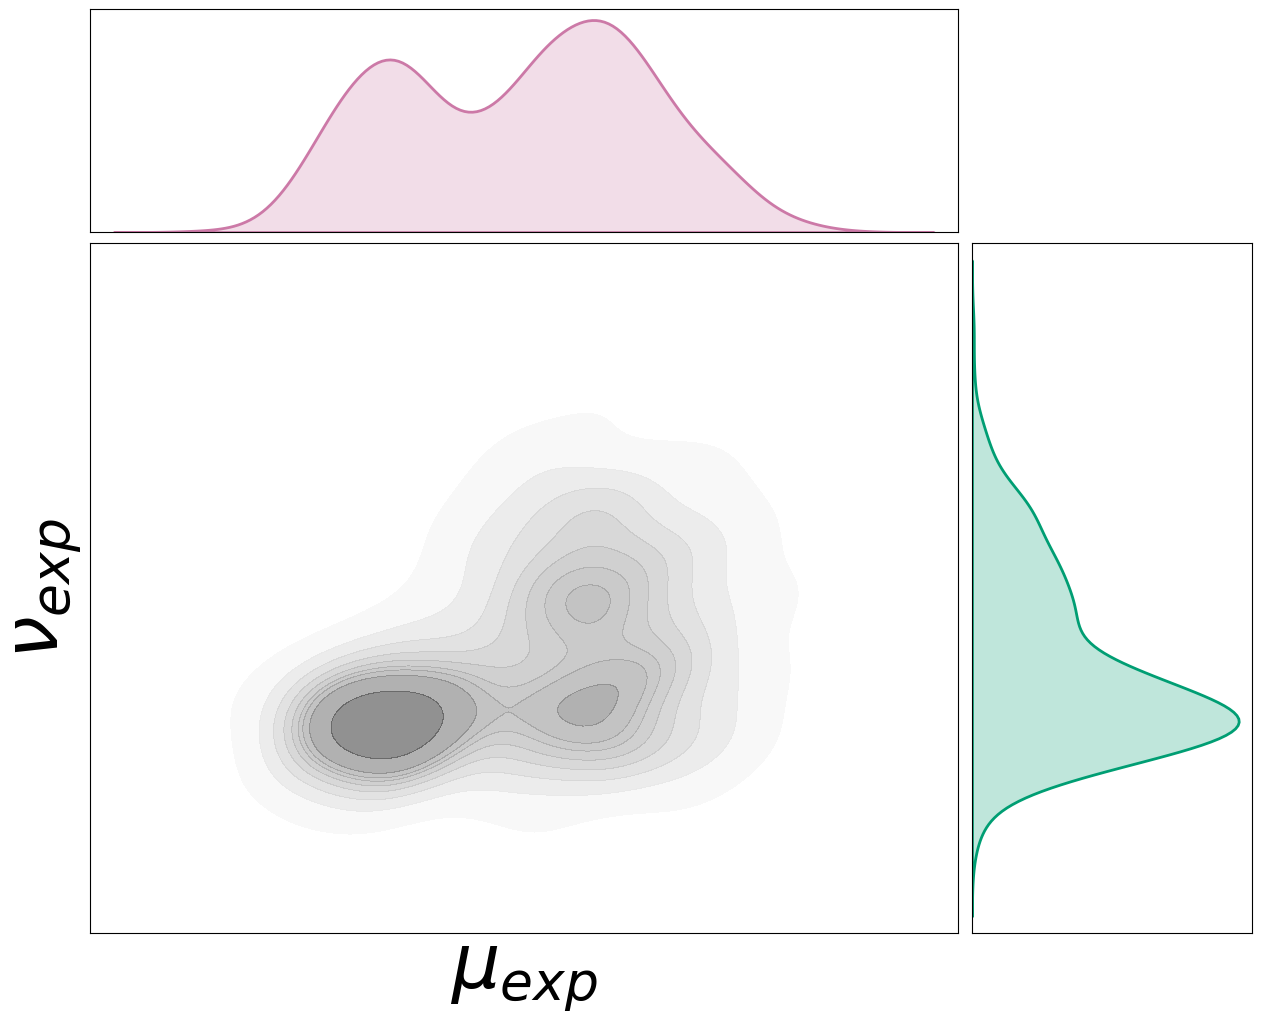

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Set random seed for reproducibility
np.random.seed(42)

# Create an asymmetrical mixture distribution for the x-axis with moderately closer peaks
x_mixture = np.concatenate([
    np.random.normal(-2, 1, 350),  # First peak centered at -3, with std dev of 1
    np.random.normal(2, 1.5, 650),  # Second peak centered at 2, with std dev of 1.5, more points
])

# Create an asymmetrical mixture distribution for the y-axis with moderately closer peaks
y_mixture = np.concatenate([
    np.random.normal(-0, 0.8, 550),  # First peak centered at -1, with std dev of 0.8
    np.random.normal(3, 2, 450)     # Second peak centered at 3, with std dev of 1.2
])

# Create the plot
# fig = plt.figure(figsize=(10, 8))

# fig = plt.figure(figsize=(15,12), tight_layout=True)
fig = plt.figure(figsize=(15, 12), constrained_layout=True)



# Create a grid of subplots for joint and marginal plots
grid = plt.GridSpec(4, 4, hspace=0.1/2, wspace=0.1/2)  # Reduce hspace and wspace to make plots closer
main_ax = fig.add_subplot(grid[1:4, 0:3])  # Main joint plot
x_hist_ax = fig.add_subplot(grid[0, 0:3], sharex=main_ax)  # Top histogram (x-axis)
y_hist_ax = fig.add_subplot(grid[1:4, 3], sharey=main_ax)  # Right histogram (y-axis)

# x_hist_ax.invert_xaxis()  # Invert horizontally to simulate a rotation

# Plot the joint KDE
sns.kdeplot(x=x_mixture, y=y_mixture, fill=True, cmap="gist_gray_r", ax=main_ax, alpha=0.5)

minority_col, majority_col, green_color = "#CC79A7", "#009E73", "#C7E9B4"


# Plot marginal KDEs for x and y on respective axes
sns.kdeplot(x=x_mixture, ax=x_hist_ax, fill=True, linewidth=2, color="#CC79A7")
sns.kdeplot(y=y_mixture, ax=y_hist_ax, fill=True, linewidth=2, color="#009E73")

# Rotate and flip the right marginal plot
y_hist_ax.invert_xaxis()  # Invert horizontally to simulate a rotation
y_hist_ax.invert_xaxis()  # Invert again to complete the rotation

# Hide tick labels and y-axis labels on marginal axes to make it cleaner
x_hist_ax.tick_params(axis="x", which="both", bottom=False, labelbottom=False)
y_hist_ax.tick_params(axis="y", which="both", left=False, labelleft=False)
x_hist_ax.set_ylabel("")  # Remove y-axis label for top marginal plot
x_hist_ax.set_xlabel("")  # Remove y-axis label for top marginal plot
y_hist_ax.set_ylabel("")  # Remove y-axis label for right marginal plot
y_hist_ax.set_xlabel("")  # Remove y-axis label for right marginal plot


x_hist_ax.tick_params(axis="x", which="both", bottom=False, labelbottom=False)
y_hist_ax.tick_params(axis="y", which="both", bottom=False, labelbottom=False)
x_hist_ax.tick_params(axis="x", which="both", bottom=False, labelbottom=False)
y_hist_ax.tick_params(axis="x", which="both", bottom=False, labelbottom=False)
y_hist_ax.tick_params(axis="y", which="both", bottom=False, labelbottom=False)
x_hist_ax.tick_params(axis="x", which="both", bottom=False, labelbottom=False)


x_hist_ax.set_ylabel("")  # Remove y-axis label for top marginal plot
y_hist_ax.set_ylabel("")  # Remove y-axis label for right marginal plot

# Turn off all ticks for the marginal and main plots
main_ax.tick_params(axis='both', which='both', bottom=False, left=False, labelbottom=False, labelleft=False)
x_hist_ax.tick_params(axis='both', which='both', bottom=False, left=False, labelbottom=False, labelleft=False)
y_hist_ax.tick_params(axis='both', which='both', bottom=False, left=False, labelbottom=False, labelleft=False)


# Set labels for the main plot
main_ax.set_xlabel(r'$\mu_{exp}$',fontsize = 55)
main_ax.set_ylabel(r'$\nu_{exp}$',fontsize = 55)

# Display the plot
plt.tight_layout()
# plt.savefig('EMD_BG.pdf')
# plt.savefig('EMD_BG.pdf', bbox_inches='tight', pad_inches=0.1)

# plt.show()


In [2]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import gaussian_kde
import ot

# Given Mixture Distributions
x_mixture = np.concatenate([
    np.random.normal(-2, 1, 350),  # First peak centered at -2, with std dev of 1
    np.random.normal(2, 1.5, 650)  # Second peak centered at 2, with std dev of 1.5, more points
])

y_mixture = np.concatenate([
    np.random.normal(0, 0.8, 550),  # First peak centered at 0, with std dev of 0.8
    np.random.normal(3, 2, 450)     # Second peak centered at 3, with std dev of 2
])

# Calculate KDE values on a defined grid
x_vals = np.linspace(min(x_mixture.min(), y_mixture.min()), max(x_mixture.max(), y_mixture.max()), 1000)

kde_x = gaussian_kde(x_mixture)
y_vals = kde_x(x_vals)

kde_y = gaussian_kde(y_mixture)
y_vals2 = kde_y(x_vals)

# Define barycenter weights
alpha = 0.5  # 0 <= alpha <= 1
weights = np.array([1 - alpha, alpha])

# Create matrix A containing all distributions
A = np.vstack((y_vals, y_vals2)).T
n_distributions = A.shape[1]

# Define the loss matrix and normalize
M = ot.utils.dist0(len(x_vals))
M /= M.max()

# Compute the Wasserstein barycenter
reg = 1e-3
bary_wass = ot.bregman.barycenter(A, M, reg, weights)

# Plotting the distributions and barycenter

import matplotlib.pyplot as plt


/opt/homebrew/lib/python3.12/site-packages/ot/bregman/_barycenter.py:209: UserWarning: Sinkhorn did not converge. You might want to increase the number of iterations `numItermax` or the regularization parameter `reg`.
  warnings.warn("Sinkhorn did not converge. You might want to "


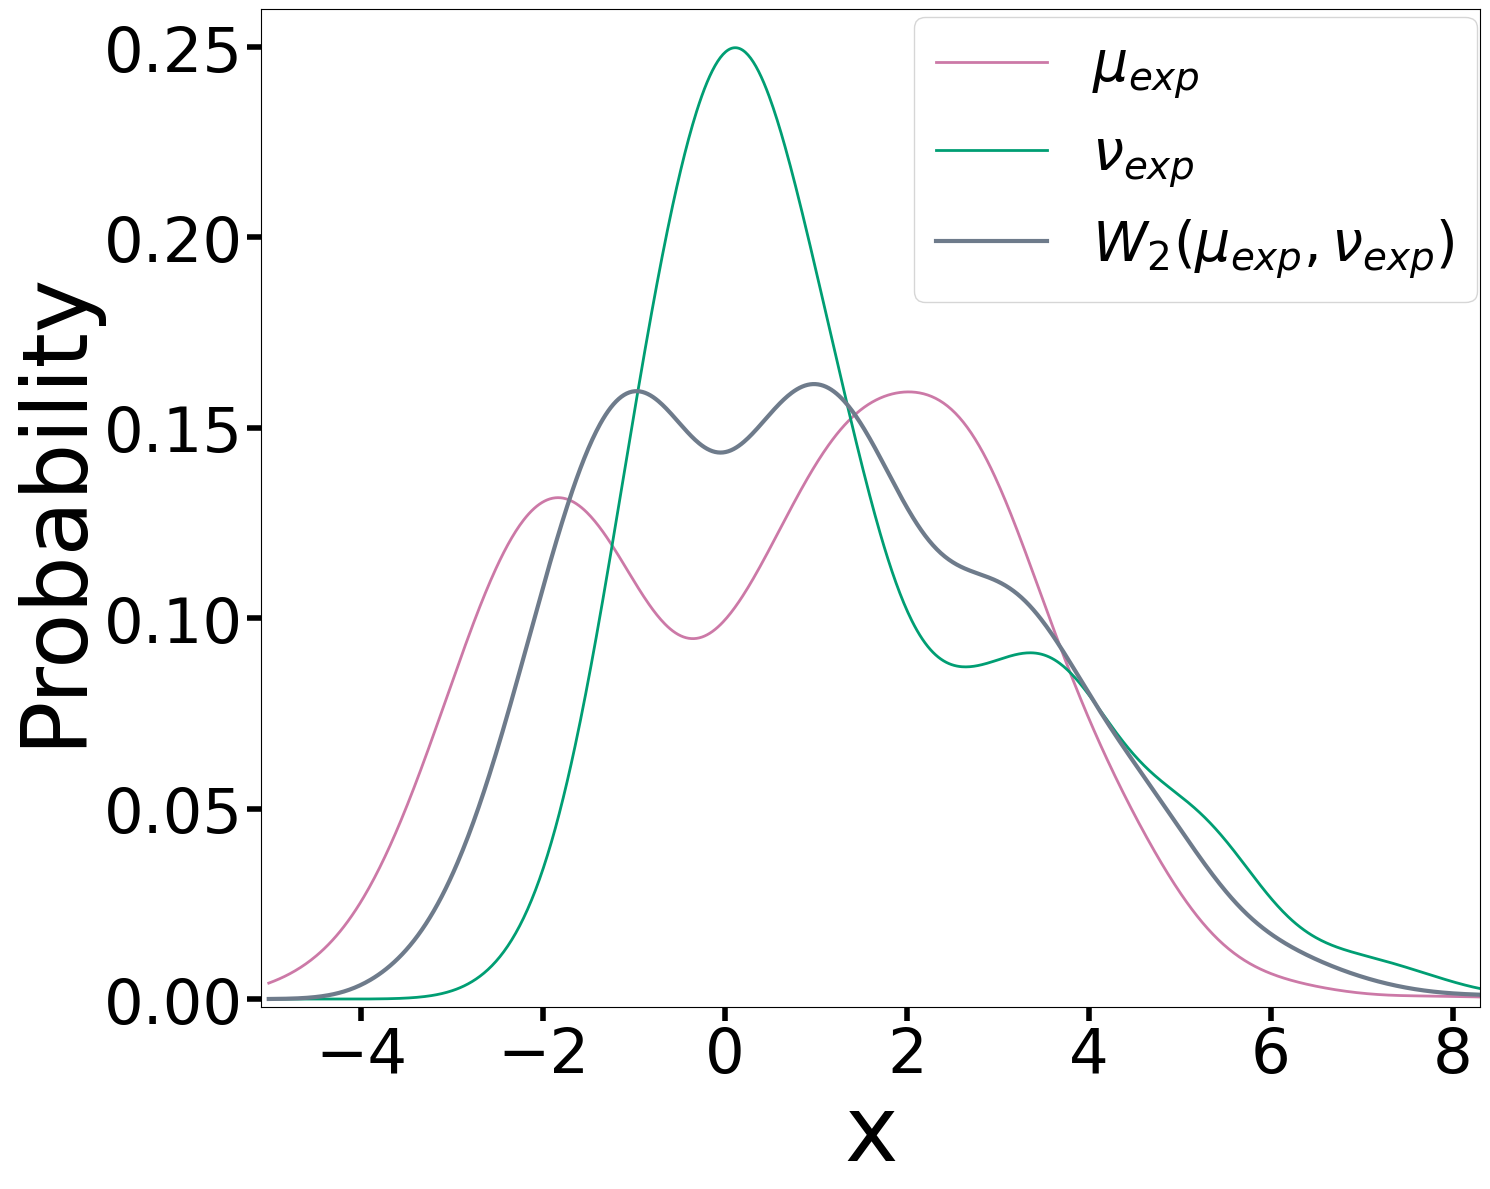

In [3]:



# Plot Distributions
plt.figure(figsize=(15,12), tight_layout=True)
plt.plot(x_vals, A[:, 0],color ='#CC79A7' , label=r'$\mu_{exp}$',linewidth =2)
plt.plot(x_vals, A[:, 1],color = '#009E73' , label=r'$\nu_{exp}$',linewidth =2)
plt.plot(x_vals, bary_wass, color = '#6E7B8B', label=r'$W_2(\mu_{exp},\nu_{exp})$',linewidth =3)

# plt.legend(fontsize=43).get_frame().set_edgecolor('black')
plt.legend(fontsize=40, loc='upper right', bbox_to_anchor=(1.02, 1.02))


plt.xticks(fontsize=45)
plt.yticks(fontsize=45)
plt.tick_params(axis='both', which='both', length=10, width=4)
plt.ylim([0-0.002,0.26])
plt.xlim([-5.1,8.3])
plt.xlabel('x',fontsize = 65)
plt.ylabel('Probability',fontsize = 65)
plt.tight_layout()
# plt.savefig('barry.pdf')

# plt.savefig('barry.pdf', bbox_inches='tight', pad_inches=0.1)
plt.show()



# main_ax.set_xlabel(r'$\mu_{exp}$',fontsize = 50)
# main_ax.set_ylabel(r'$\nu_{exp}$',fontsize = 50)




In [82]:
dataset = [
    (0.87, 'alpha', 1), (0.73, 'alpha', 1), (0.65, 'alpha', 0), (0.45, 'alpha', 1),
    (0.38, 'alpha', 0), (0.29, 'alpha', 0), (0.15, 'alpha', 0), (0.92, 'beta', 1),
    (0.78, 'beta', 1), (0.60, 'beta', 1), (0.50, 'beta', 0), (0.42, 'beta', 0),
    (0.35, 'beta', 0), (0.28, 'beta', 0), (0.18, 'beta', 0)
]
import numpy as np


cnt1 = 0
cnt2 = 0
cnt3 = 0
num = 500000
# Define the threshold
for threshold in np.random.randint(0,1000000,num)/1000000:



    # print(threshold)
    # Initialize counters for each group
    metrics = {
        'alpha': {'TP': 0, 'FP': 0, 'TN': 0, 'FN': 0},
        'beta': {'TP': 0, 'FP': 0, 'TN': 0, 'FN': 0}
    }

    # Calculate TP, FP, TN, FN for each group
    for score, group, ground_truth in dataset:
        if score >= threshold:  # Classified as positive
            if ground_truth == 1:
                metrics[group]['TP'] += 1
            else:
                metrics[group]['FP'] += 1
        else:  # Classified as negative
            if ground_truth == 1:
                metrics[group]['FN'] += 1
            else:
                metrics[group]['TN'] += 1

    # Calculate metrics for each group
    def calculate_metrics(group_metrics):
        TP = group_metrics['TP']
        FP = group_metrics['FP']
        TN = group_metrics['TN']
        FN = group_metrics['FN']

        TPR = TP / (TP + FN) if (TP + FN) > 0 else 0  # True Positive Rate
        FPR = FP / (FP + TN) if (FP + TN) > 0 else 0  # False Positive Rate
        TNR = TN / (FP + TN) if (FP + TN) > 0 else 0  # True Negative Rate
        FNR = FN / (TP + FN) if (TP + FN) > 0 else 0  # False Negative Rate
        PR = (TP + FP) / (TP + FP + TN + FN)  # Positive Rate

        return {
            'TPR': TPR,
            'FPR': FPR,
            'TNR': TNR,
            'FNR': FNR,
            'PR': PR
        }

    # Calculate and print metrics for each group
    # for group in ['alpha', 'beta']:
    #     group_metrics = calculate_metrics(metrics[group])
    #     print(f"Metrics for group {group}:")
    #     for metric_name, value in group_metrics.items():
    #         # if metric_name != 'PR': continue
    #         print(f"  {metric_name}: {100*value:.2f}")

    
    group_metrics_minor = calculate_metrics(metrics['alpha'])
    group_metrics_major = calculate_metrics(metrics['beta'])


    
    cnt1+= np.abs(group_metrics_major['PR']- group_metrics_minor['PR'])
    cnt2+= np.abs(group_metrics_major['TPR']- group_metrics_minor['TPR'])
    cnt3+= np.abs(group_metrics_major['TPR']- group_metrics_minor['TPR']) + np.abs(group_metrics_major['FPR']- group_metrics_minor['FPR'])


round(100*(cnt1/num),2), round(100*(cnt2/num),2),round(100*(cnt3/num),2)




(5.02, 8.33, 15.37)

In [30]:
# import numpy as np
# from sklearn.metrics import roc_curve
# # from scipy.integrate import simps
# from scipy.integrate import simpson


# # Define the function to calculate xAUC_minor^major
# def xAUC_minor_major(y_true, y_scores, group, minor_label, major_label):
#     # Extract indices of the minority and majority groups
#     minor_indices = (group == minor_label)
#     major_indices = (group == major_label)

#     # Get true labels and scores for the minority and majority groups
#     y_true_minor = y_true[minor_indices]
#     y_scores_minor = y_scores[minor_indices]
#     y_true_major = y_true[major_indices]
#     y_scores_major = y_scores[major_indices]

#     # Compute the FPR, TPR, and thresholds for the majority group
#     fpr_major, tpr_major, thresholds_major = roc_curve(y_true_major, y_scores_major, pos_label=1)

#     # Compute the FPR, TPR, and thresholds for the minority group
#     fpr_minor, tpr_minor, thresholds_minor = roc_curve(y_true_minor, y_scores_minor, pos_label=1)

#     # Interpolate TPR of the minority group at each FPR of the majority group
#     # tpr_at_fpr_major = np.interp(fpr_major, fpr_minor, tpr_minor)

#     tpr_at_fpr_major = np.interp(fpr_major, fpr_minor, tpr_minor)

#     # Integrate to calculate the xAUC using the Simpson's rule
#     xauc = simpson(y=tpr_at_fpr_major, x=fpr_major)

#     return xauc
# # Example usage
# dataset = [
#     (0.87, 'alpha', 1), (0.73, 'alpha', 1), (0.65, 'alpha', 0), (0.45, 'alpha', 1),
#     (0.38, 'alpha', 0), (0.29, 'alpha', 0), (0.15, 'alpha', 0), (0.92, 'beta', 1),
#     (0.78, 'beta', 1), (0.60, 'beta', 1), (0.50, 'beta', 0), (0.42, 'beta', 0),
#     (0.35, 'beta', 0), (0.28, 'beta', 0), (0.18, 'beta', 0)
# ]


# y_true = np.array([1,1,0,1,0,0,0,1,1,1,0,0,0,0,0,])
# y_scores = np.array([0.87,0.73,0.65,0.45,0.38,0.29,0.15,0.92,0.78,0.6,0.5,0.42,0.35,0.28,0.18])
# group = np.array(['minor','minor','minor','minor','minor','minor','minor','major','major','major','major','major','major','major','major',])

# xauc = xAUC_minor_major(y_true, y_scores, group, minor_label='minor', major_label='major')
# print("xAUC_minor^major:",round(100*xauc,2))


# group = np.array(['major','major','major','major','major','major','major','minor','minor','minor','minor','minor','minor','minor','minor',])
# xauc2 = xAUC_minor_major(y_true, y_scores, group, minor_label='minor', major_label='major')


# print(r"xAUC_major^minor:", round(100*xauc2,2))


# print('Delta_xAUC',round(100*(xauc2-xauc),2))

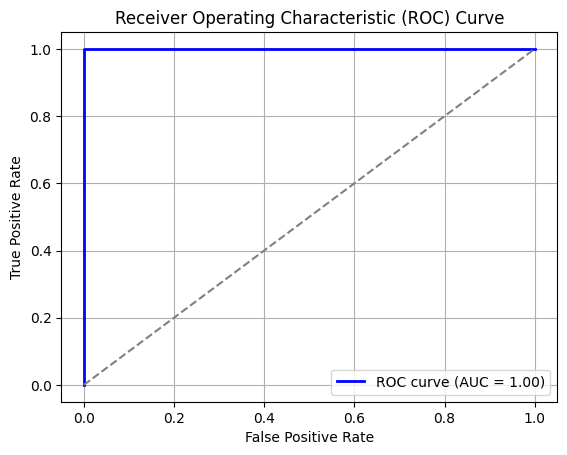

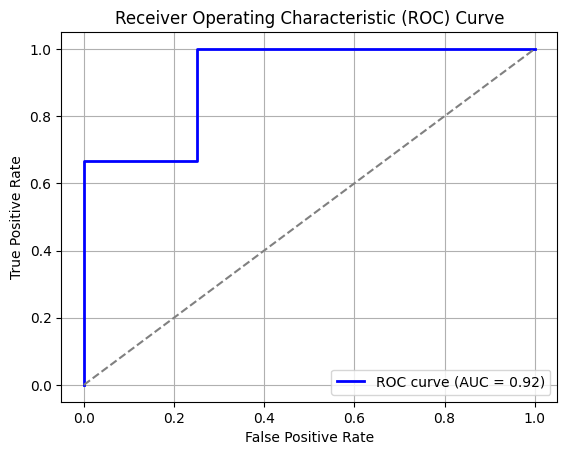

In [34]:
               
from sklearn.metrics import roc_curve, auc
import matplotlib.pyplot as plt

y_true= np.array([1,1,1,0,0,0,0,0,])
y_scores = np.array([0.92,0.78,0.6,0.5,0.42,0.35,0.28,0.18])


fpr, tpr, thresholds = roc_curve(y_true, y_scores)
auc_ = auc(fpr, tpr)

# Plot the ROC curve
plt.figure()
plt.plot(fpr, tpr, color='blue', lw=2, label=f'ROC curve (AUC = {auc_:.2f})')
plt.plot([0, 1], [0, 1], color='gray', linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc='lower right')
plt.grid()
plt.show()




y_true = np.array([1,1,0,1,0,0,0])
y_scores = np.array([0.87,0.73,0.65,0.45,0.38,0.29,0.15])

fpr, tpr, thresholds = roc_curve(y_true, y_scores)
auc_ = auc(fpr, tpr)
      # Plot the ROC curve
plt.figure()
plt.plot(fpr, tpr, color='blue', lw=2, label=f'ROC curve (AUC = {auc_:.2f})')
plt.plot([0, 1], [0, 1], color='gray', linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc='lower right')
plt.grid()
plt.show()


In [29]:

import matplotlib.pyplot as plt
import numpy as np 
import pandas as pd 
from sklearn.linear_model import LogisticRegression
from sklearn import metrics
from sklearn.calibration import calibration_curve
from sklearn.metrics import (brier_score_loss, precision_score, recall_score,
                             f1_score)


n_thresh = 200; 

def get_roc(n_thresh, Rhat, Y):
    thresholds = np.linspace(1,0,n_thresh)
    ROC = np.zeros((n_thresh,2))
    for i in range(n_thresh):
        t = thresholds[i]
        # Classifier / label agree and disagreements for current threshold.
        TP_t = np.logical_and( Rhat > t, Y==1 ).sum()
        TN_t = np.logical_and( Rhat <=t, Y==0 ).sum()
        FP_t = np.logical_and( Rhat > t, Y==0 ).sum()
        FN_t = np.logical_and( Rhat <=t, Y==1 ).sum()
        # Compute false positive rate for current threshold.
        FPR_t = FP_t / float(FP_t + TN_t)
        ROC[i,0] = FPR_t
        # Compute true  positive rate for current threshold.
        TPR_t = TP_t / float(TP_t + FN_t)
        ROC[i,1] = TPR_t
    return ROC


def get_cross_roc(n_thresh, Rhat_a, Rhat_b, Y_a, Y_b, A):
    thresholds = np.linspace(1,0,n_thresh)
    XROC = np.zeros((n_thresh,2))
    for i in range(n_thresh):
        t = thresholds[i]
        # Classifier / label agree and disagreements for current threshold.
        TP_t_b = np.logical_and( Rhat_b > t, Y_b==1 ).sum()
        TN_t_a = np.logical_and( Rhat_a <=t, Y_a==0 ).sum()
        FP_t_a = np.logical_and( Rhat_a > t, Y_a==0 ).sum()
        FN_t_b = np.logical_and( Rhat_b <=t, Y_b==1 ).sum()
        # Compute false positive rate for current threshold.
        FPR_t_a = FP_t_a*1.0 / (FP_t_a + TN_t_a)

        XROC[i,1] = FPR_t_a
        # Compute true  positive rate for current threshold.
        TPR_t_b = TP_t_b*1.0 / (TP_t_b + FN_t_b)
        XROC[i,0] = TPR_t_b
    return XROC
classes = ['minor', 'major']


Y = np.array([1,1,0,1,0,0,0,1,1,1,0,0,0,0,0,])
Rhat = np.array([0.87,0.73,0.65,0.45,0.38,0.29,0.15,0.92,0.78,0.6,0.5,0.42,0.35,0.28,0.18])
A = np.array(['minor','minor','minor','minor','minor','minor','minor','major','major','major','major','major','major','major','major',])



ROCs_A = [None] * len(np.unique(A))
ROCs = [ get_roc(n_thresh, Rhat[A==a], Y[A==a]) for a in np.unique(A) ] 
# plt.figure(figsize=(3,3))
# [ plt.plot(ROCs[a][:,0], ROCs[a][:,1], label = classes[a]) for a in range(len(np.unique(A))) ]
# plt.legend()
XROC = get_cross_roc(n_thresh, Rhat[A==0], Rhat[A==1], Y[A==0], Y[A==1], A)
# plt.figure(figsize=(3,3))
# plt.plot(XROC[:,0], XROC[:,1])
# plt.xlabel('TPR A=1')
# plt.ylabel('FPR A=0')
# plt.title('XROC curve')

# plt.figure(figsize=(3,3))
# plt.plot(XROC[:,1], XROC[:,0])
# plt.ylabel('TPR A=1')
# plt.xlabel('FPR A=0')
# plt.title('axis-flipped XROC curve')

XROC_backwards = get_cross_roc(n_thresh, Rhat[A==1], Rhat[A==0],Y[A==1], Y[A==0], A)
# plt.figure(figsize=(3,3))
# plt.plot(XROC_backwards[:,0], XROC_backwards[:,1])
# plt.xlabel('TPR A=1')
# plt.ylabel('FPR A=0')
# plt.title(r'XROC curve, $R_b^0 > R_a^1$')


class_levels = np.unique(A)
AUCs = np.zeros(len(class_levels))
for ind,a in enumerate(class_levels): 
    fpr, tpr, thresholds = metrics.roc_curve(Y[A==a], Rhat[A==a], pos_label=1)
    AUCs[ind] = metrics.auc(fpr,tpr)
    
def get_AUCs(Rhat, Y, A): 
    class_levels = np.unique(A); AUCs = np.zeros(len(class_levels))
    for ind,a in enumerate(class_levels): 
        fpr, tpr, thresholds = metrics.roc_curve(Y[A==a], Rhat[A==a], pos_label=1)
        AUCs[ind] = metrics.auc(fpr,tpr)
    return AUCs

# [ (AUCs[i], classes[i]) for i in class_levels ]
class_levels = np.unique(A)
for i in class_levels:
    i
# [classes[i]]


class_levels = np.unique(A)
AUCs = np.zeros(len(class_levels))

for ind,a in enumerate(class_levels): 
    fpr, tpr, thresholds = metrics.roc_curve(Y[A==a], Rhat[A==a], pos_label=1)
    
    AUCs[ind] = metrics.auc(fpr,tpr)
    print(AUCs[ind],a)
AUCs[0] - AUCs[1]

1.0 major
0.9166666666666666 minor


/var/folders/6d/skl7zt150mq7s0bxj015f9cc0000gn/T/ipykernel_6399/3820775465.py:43: RuntimeWarning: invalid value encountered in scalar divide
  FPR_t_a = FP_t_a*1.0 / (FP_t_a + TN_t_a)
/var/folders/6d/skl7zt150mq7s0bxj015f9cc0000gn/T/ipykernel_6399/3820775465.py:47: RuntimeWarning: invalid value encountered in scalar divide
  TPR_t_b = TP_t_b*1.0 / (TP_t_b + FN_t_b)


0.08333333333333337

In [ ]:
1.0